In [1]:
%matplotlib inline

In [19]:
import numpy as np
import matplotlib.pyplot as pl

In [20]:
fB = 32e9;	# Velocidad de simbolos (baud rate)
T = 1/fB; # Tiempo entre simbolos
M = 8;  #Factor de sobremuestreo
fs = fB*M;	# Sample rate

beta = .1500#; %Factor de roll-off
L = 20;  # 2*L*M+1 es el largo del filtro sobremuestreado
t = np.arange(-L,L,1./M)*T#[-L:1/M:L]*T;
n_delay_filter = L*M# %Retardo del filtro
gn = [np.sinc(t2/T)*np.cos(np.pi*beta*t2/T)/(1-4*beta**2*t2**2/T**2) for t2 in t];



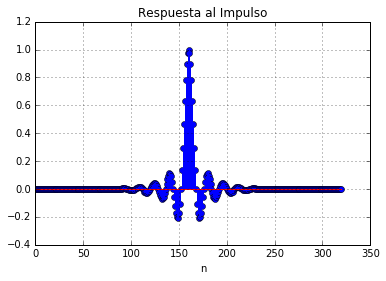

In [23]:
pl.stem(gn)
pl.title('Respuesta al Impulso');
pl.xlabel('n');
pl.grid()
pl.draw()

In [27]:
Omega = np.arange(0,1,1./2**8)*np.pi;

N = 1000;
H_Mag=[]                  
H_Fase=[]
for omega in Omega:
    xn = [np.exp(np.complex(0,omega*n)) for n in xrange(N)];
    yn = np.convolve(xn,gn);
    H_Mag.append( np.abs(yn[N/2]))
    H_Fase.append(np.angle(yn[N/2]*np.conj(xn[N/2-n_delay_filter])))


In [8]:
np.arange?

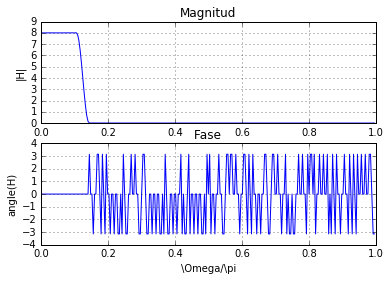

In [30]:
pl.subplot(2,1,1)
pl.plot(Omega/np.pi,H_Mag);
pl.title('Magnitud');
pl.ylabel('|H|')
pl.xlabel('\Omega/\pi');
pl.grid()
pl.subplot(2,1,2) 
pl.plot(Omega/np.pi,H_Fase);
pl.title('Fase');
pl.ylabel('angle(H)')
pl.xlabel('\Omega/\pi');
pl.grid()
pl.draw()


In [68]:
n_symbols = 1000;
ak = 2*np.random.randint(2,size=(1,n_symbols))-1
xn=np.zeros((n_symbols*M))
xn[::M]=ak

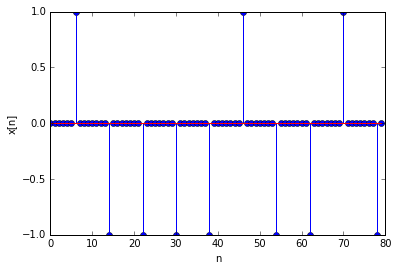

In [74]:
pl.stem(xn[10:10+M*10])

pl.ylabel('x[n]')
pl.xlabel('n');
pl.draw()

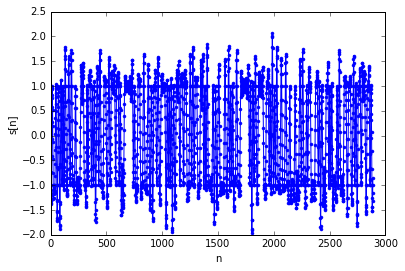

In [76]:
sn = np.convolve(xn,gn);
pl.figure(4)
pl.plot(sn[(2*L*M+1):(2*L*M+1)*10],'.-');
pl.ylabel('s[n]')
pl.xlabel('n');
pl.draw()

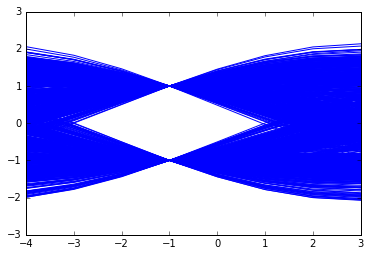

In [86]:
d = 5; #Delay para centrar el ojo
pl.hold(True)
for m in range( 2*L+1,n_symbols-(2*L+1)):
    sn_p = sn[m*M+d:m*M+d+M];
    pl.plot(range(-M/2,M/2),sn_p,'b')

pl.show()